# Logistische Regression Projekt - Aufgaben

In diesem Projekt werden wir mit Fake-Daten zu Werbung arbeiten, die aufzeigen, ob ein Nutzer auf eine Werbeanzeige auf einer Webseite einer Firma geklickt hat oder nicht. Wir werden versuchen ein Modell zu erstellen, das anhand von Nutzereigenschaften vorhersagt, ob dieser auf die Werbung klicken wird oder nicht.

Der Datensatz beinhaltet folgende Eigenschaften:

* 'Daily Time Spent on Site': Zeit auf der Webseite in Minuten
* 'Age': Alter in Jahren
* 'Area Income': Durchschnittliches Einkommen der Region des Nutzers
* 'Daily Internet Usage': Durchschnittliche Minutenzahl die der Nutzer täglich im Internet ist
* 'Ad Topic Line': Überschrift der Werbung
* 'City': Stadt des Nutzers
* 'Male': Ob der Nutzer männlich ist (1) oder nicht (0)
* 'Country': Land des Nutzers
* 'Timestamp': Zeit zu der der Nutzer auf die Werbung geklickt oder das Fenster geschlossen hat
* 'Clicked on Ad': Ob der Nutzer gelickt hat (1) oder nicht (0)

## Libraries importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Die Daten

**Lese die advertising.csv Datei ein und erstelle einen DataFrame namens ad_data.**

In [2]:
df = pd.read_csv('Advertising.csv')

**Überprüfe den Beginn des DataFrames.**

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Wende info() und describe() auf ad_data an.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Explorative Datensanalyse

Verwende Seaborn, um die Daten zu erforschen.

Versuche dazu die dargestellten Plots nachzustellen!

**Erstelle ein Histogramm von Alter (en. Age).**

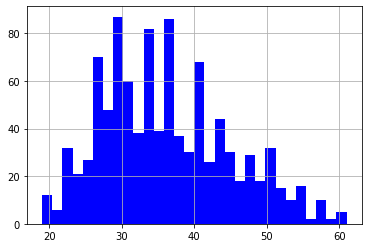

In [6]:
df['Age'].hist(bins=30,color='blue')

**Erstelle ein Jointplot, das "Area Income" mit "Age" vergleicht.**

In [7]:
# Dein Code hier
# Sonst überschreibst du das Diagramm

**Erstelle ein Jointplot, das die KDE Verteilung von "Daily Time Spent on Site" gegen "Age" aufzeichnet.**

In [8]:
# Dein Code hier
# Sonst überschreibst du das Diagramm

**Erstelle ein Jointplot für "Daily Time Spent On Site" gegen "Daily Internet Usage".**

In [9]:
# Dein Code hier
# Sonst überschreibst du das Diagramm

**Und zum Schluss erstelle noch ein Pairplot mit "Clicked on Ad" als Hue.**

In [10]:
# Dein Code hier
# Sonst überschreibst du das Diagramm

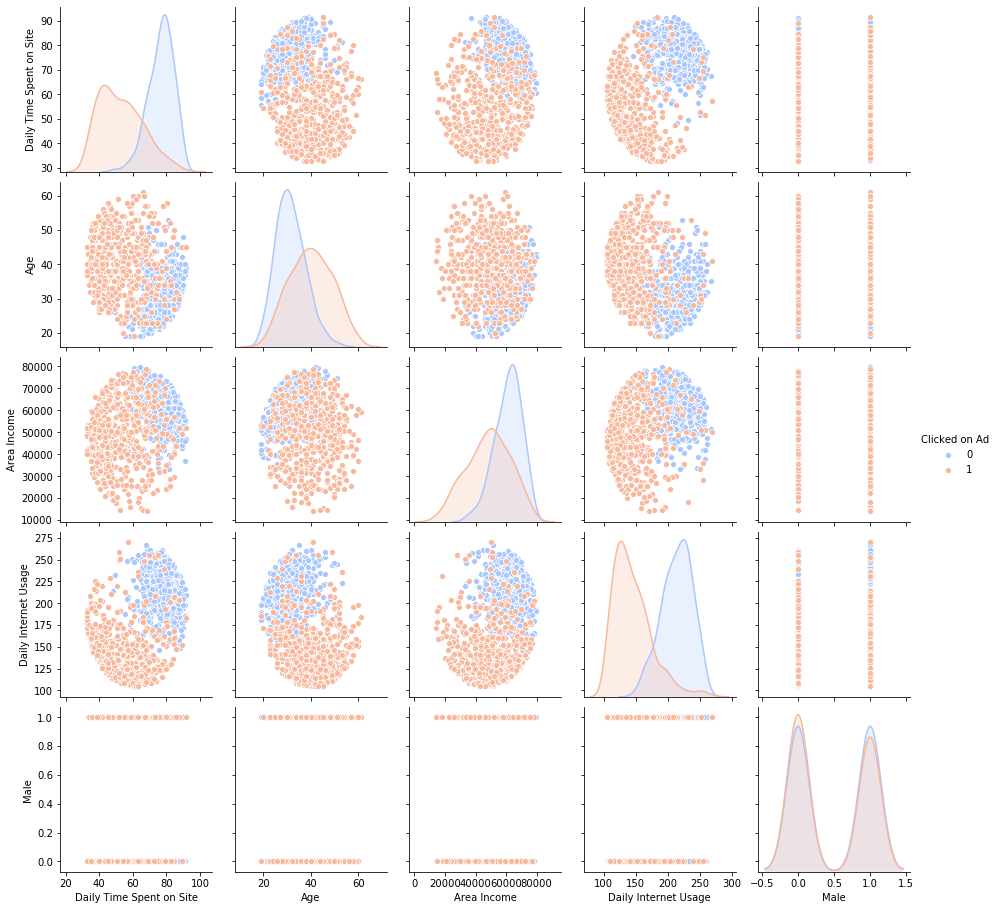

In [22]:
sns.pairplot(df,hue='Clicked on Ad',palette='coolwarm')


## Logistische Regression

Jetzt ist es Zeit, um unsere Daten in Trainings- und Testset aufzuteilen. So können wir unser Modell trainieren.

Du hast die Wahl der Spalten, die du verwenden möchtest!

**Teile die Daten in Trainings- und Testset auf.**

In [11]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [12]:
df = df.drop(['Ad Topic Line', 'City', 'Timestamp', 'Country'], axis=1)

In [13]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Clicked on Ad',axis=1), 
                                                    df['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

**Trainiere und fitte ein logistisches Regressionsmodell auf das Trainignsset.**

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Vorhersagen und Auswertung

**Sage jetzt die Werte für die Testdaten voraus.**

In [17]:
predictions = logmodel.predict(X_test)

**Erstelle einen Klassifizierungsreport für das Modell.**

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [19]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[149,   8],
       [ 14, 129]], dtype=int64)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    '''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

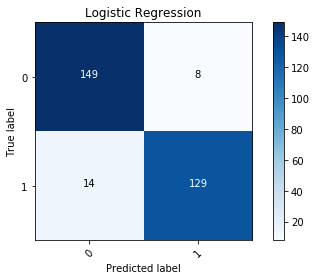

In [21]:
labels = np.unique(y_test)
DT_CM = plot_confusion_matrix(cnf_matrix, classes=labels,
                      title="Logistic Regression")

# Gut gemacht!